<a href="https://colab.research.google.com/github/Ayushrawat651/Ayushrawat651/blob/main/My_projects/Digit_Recognition/Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix
#from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import random

In [ ]:
# Get the data
train_data = pd.read_csv('/train.csv')
test_data = pd.read_csv('/test.csv')

# The test data doesn't have labels so we will have to make our own validation data
train_size = round(0.8 * len(train_data))
val_size = round(0.2 * len(train_data))

train_features = train_data[:train_size]
val_features = train_data[train_size:]

train_labels = train_features.pop('label')
val_labels = val_features.pop('label')


In [ ]:
# Create the model
model = KNeighborsClassifier(n_neighbors=3)

train_matrix = csr_matrix(train_features.values)
model.fit(train_matrix, train_labels.values)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
print("Accuracy:")
print(model.score(val_features.values, val_labels.values))

Accuracy:
0.9695238095238096


Prediction: 1


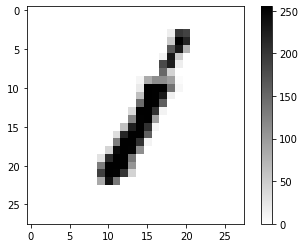

Prediction: 9


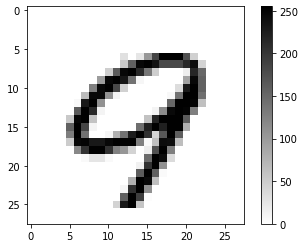

Prediction: 7


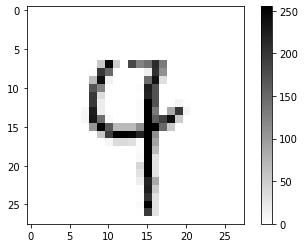

Prediction: 7


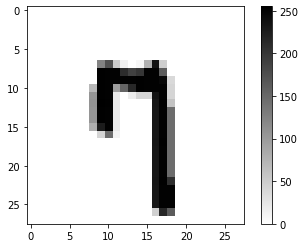

Prediction: 2


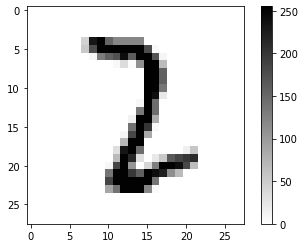

In [ ]:
# Make predictions
def show_image(img):
    plt.figure()
    plt.imshow(img, cmap=plt.cm.binary)
    plt.colorbar()
    plt.grid(False)
    plt.show()

def predict(model, image_num):
    image = test_data.iloc[image_num,0:].values.reshape(28,28)
    image_matrix = csr_matrix(test_data.iloc[image_num,0:].values)
    
    class_names = ['0','1','2','3','4','5','6','7','8','9']
    prediction = model.predict(image_matrix)

    print("Prediction: " + str(prediction[0]))
    show_image(image)
    
def make_n_predictions(model, n):
    for i in range(n):
        random_image = random.randint(0,27999)
        predict(model, random_image)
        
# Makes 5 random predictions
make_n_predictions(model, 5)